**Kezia Elice Yulianto - 0706022210006**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

## Load Dataset

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/Bank.csv', delimiter=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4449,31,self-employed,single,secondary,no,360,yes,no,unknown,26,may,592,4,-1,0,unknown,no
505,31,unemployed,married,secondary,no,296,yes,no,unknown,20,may,378,3,-1,0,unknown,no
1063,33,blue-collar,married,primary,no,1165,yes,no,unknown,21,may,420,2,-1,0,unknown,no
3890,31,services,divorced,primary,no,459,yes,no,cellular,7,may,623,1,293,1,success,yes
3603,44,blue-collar,married,secondary,no,16178,yes,no,cellular,21,nov,297,1,-1,0,unknown,no
2941,36,admin.,single,secondary,no,47,no,yes,cellular,9,jul,36,6,-1,0,unknown,no
1985,29,student,single,unknown,no,145,no,no,cellular,14,aug,105,1,-1,0,unknown,no
1408,49,blue-collar,divorced,unknown,no,39,yes,no,cellular,13,may,27,5,-1,0,unknown,no
2370,37,technician,single,secondary,no,-242,yes,no,cellular,13,aug,1149,6,-1,0,unknown,yes
3013,49,technician,married,tertiary,no,523,yes,no,cellular,3,mar,152,2,-1,0,unknown,yes


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [110]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [111]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [112]:
job_count = df['job'].value_counts(dropna=False)
print(job_count)
print()

marital_count = df['marital'].value_counts(dropna=False)
print(marital_count)
print()

education_count = df['education'].value_counts(dropna=False)
print(education_count)
print()

default_count = df['default'].value_counts(dropna=False)
print(default_count)
print()

housing_count = df['housing'].value_counts(dropna=False)
print(housing_count)
print()

loan_count = df['loan'].value_counts(dropna=False)
print(loan_count)
print()

contact_count = df['contact'].value_counts(dropna=False)
print(contact_count)
print()

month_count = df['month'].value_counts(dropna=False)
print(month_count)
print()

poutcome_count = df['poutcome'].value_counts(dropna=False)
print(poutcome_count)
print()

y_count = df['y'].value_counts(dropna=False)
print(y_count)
print()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

default
no     4445
yes      76
Name: count, dtype: int64

housing
yes    2559
no     1962
Name: count, dtype: int64

loan
no     3830
yes     691
Name: count, dtype: int64

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

poutcome
unknown    3705
failure     490
other       197
success     129
Name: cou

In [113]:
df['job'] = df['job'].replace({'admin.': 'admin_management', 'management': 'admin_management'})
job_count = df['job'].value_counts(dropna=False)
print(job_count)

# Combine unique value 'admin' dan 'management' di dalam kolom job menjadi satu categorical value.

job
admin_management    1447
blue-collar          946
technician           768
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
unknown               38
Name: count, dtype: int64


In [114]:
columns = ['job', 'education', 'contact', 'poutcome']

for column in columns:
    mode = df[column].mode()[0]  # Mode untuk setiap kolom
    df[column] = df[column].replace('unknown', mode)  # Replace 'unknown' dengan mode

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,admin_management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,admin_management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,unknown,no


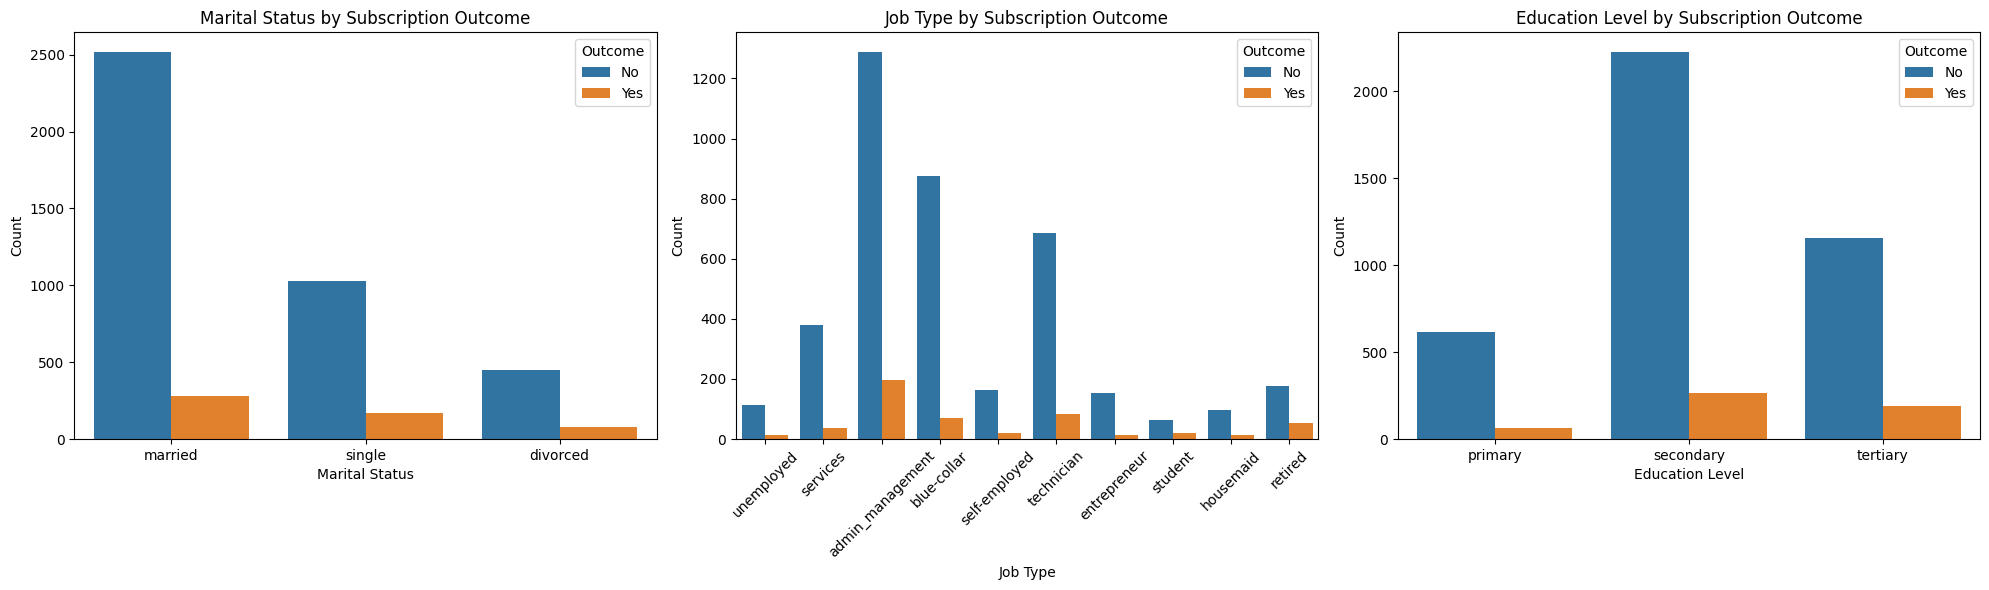

In [115]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='marital', hue='y')
plt.title('Marital Status by Subscription Outcome')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No', 'Yes'])

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='job', hue='y')
plt.title('Job Type by Subscription Outcome')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['No', 'Yes'])

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='education', hue='y')
plt.title('Education Level by Subscription Outcome')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# Marital Status by Subscription Outcome:
# Mayoritas individu yang tidak berhasil berlangganan berada dalam status "married" (menikah). Selain itu, status "single" dan "divorced" memiliki jumlah yang lebih sedikit dalam kedua kategori hasil (Yes atau No).
# Jadi, orang yang menikah cenderung lebih banyak dihubungi, tetapi tingkat keberhasilan mereka lebih rendah dibandingkan dengan kategori lainnya.

# Job Type by Subscription Outcome:
# Pekerjaan "management" dan "blue-collar" mendominasi kelompok yang tidak berhasil berlangganan. Namun, beberapa profesi, seperti "student" dan "retired," memiliki persentase keberhasilan lebih tinggi meskipun dengan jumlah yang lebih sedikit.
# Jadi, profesi tertentu, seperti "student" dan "retired," mungkin memiliki ketertarikan lebih tinggi dalam berlangganan, sementara "management" dan "blue-collar" perlu pendekatan yang berbeda.

# Education Level by Subscription Outcome:
# Mayoritas individu yang tidak berhasil berlangganan memiliki tingkat pendidikan "secondary" (menengah), diikuti oleh "tertiary" (tinggi) dan primary (rendah).
# Orang dengan tingkat pendidikan lebih tinggi (tertiary) tampaknya sedikit lebih tertarik untuk berlangganan dibandingkan tingkat pendidikan yang lebih rendah, tetapi mayoritas yang dihubungi memiliki pendidikan menengah.

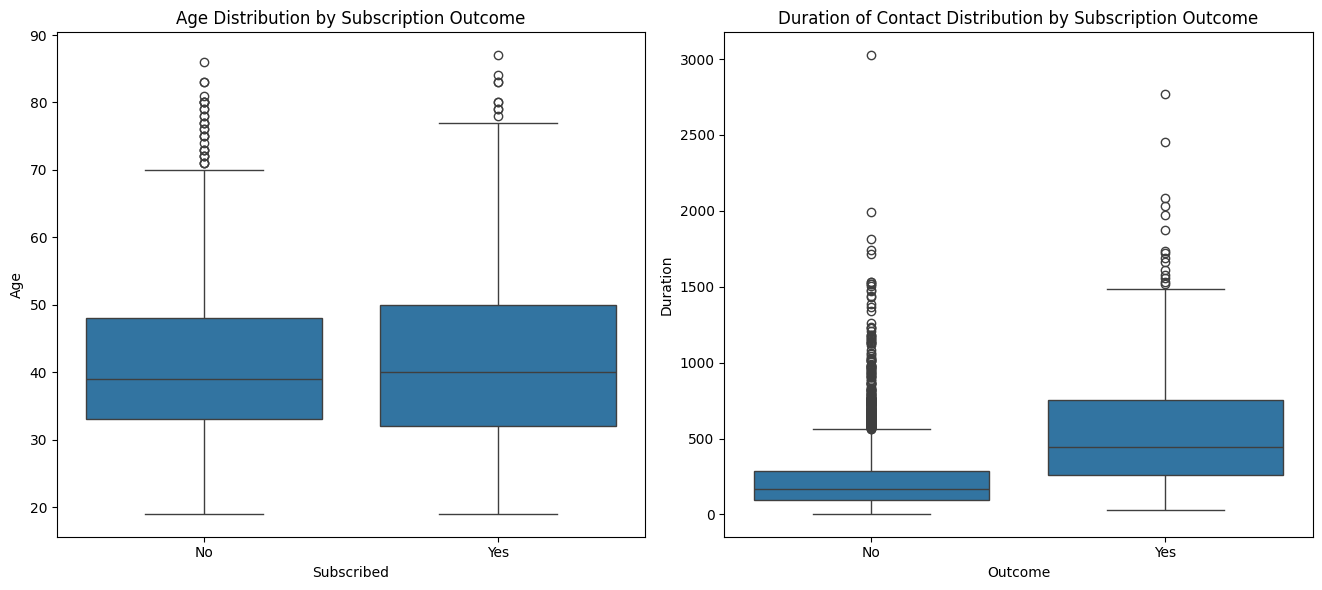

In [116]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution by Subscription Outcome')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='y', y='duration')
plt.title('Duration of Contact Distribution by Subscription Outcome')
plt.xlabel('Outcome')
plt.ylabel('Duration')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

# Age Distribution by Subscription Outcome:
# Distribusi usia terlihat cukup mirip untuk kelompok yang berhasil berlangganan (Yes) dan yang tidak (No).
# Kedua kelompok memiliki rentang usia yang hampir sama, dengan mayoritas berada di kisaran usia 30 hingga 50 tahun, dan beberapa outlier di atas 70 tahun.
# Kesimpulannya, usia mungkin bukan merupakan faktor yang signifikan dalam menentukan keberhasilan berlangganan, karena distribusi untuk kedua kelompok relatif serupa.

# Duration of Contact Distribution by Subscription Outcome:
# Kelompok yang berhasil berlangganan (Yes) memiliki durasi kontak yang lebih panjang, dengan median lebih tinggi dibandingkan dengan kelompok yang tidak berlangganan.
# Jadi, durasi kontak yang lebih lama mungkin berkaitan positif dengan keberhasilan berlangganan. Hal ini menunjukkan bahwa semakin lama percakapan berlangsung, semakin besar kemungkinan calon pelanggan untuk berlangganan.

In [117]:
label_encoder = LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(education_mapping)
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['y'] = label_encoder.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,1,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,2,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,3,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,3,0,1476,1,1,0,3,6,199,4,-1,0,3,0
4,59,1,1,2,0,0,1,0,0,5,8,226,1,-1,0,3,0


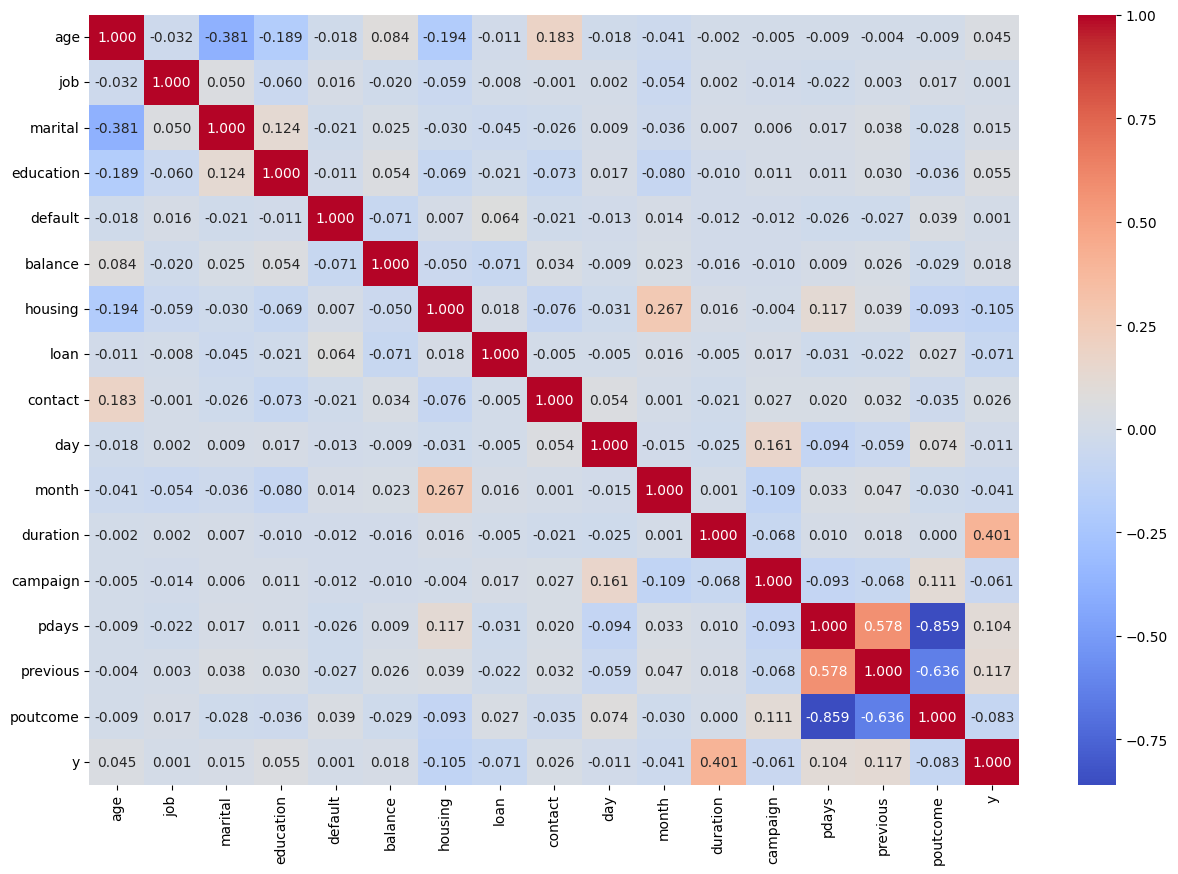

In [118]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

## Machine Learning (Split Data)

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

1. Using all independent variables as X

In [119]:
X = df.drop('y', axis=1)
y = df['y']

In [120]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [122]:
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

In [123]:
clf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [124]:
y_pred = clf.predict(X_test)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.861875


In [126]:
# Menghitung dan mencetak score dari training set
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.8656
Test set score: 0.8619


In [127]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[669 132]
 [ 89 710]]


In [128]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       801
           1       0.84      0.89      0.87       799

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



2. Use only 'duration', 'pdays', 'previous', and 'housing' as the independent variables

In [129]:
X = df[['duration', 'pdays', 'previous', 'housing']]
y = df['y']

In [130]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [132]:
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

In [133]:
clf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [134]:
y_pred = clf.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.838125


In [136]:
# Menghitung dan mencetak score dari training set
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.8233
Test set score: 0.8381


In [137]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[645 156]
 [103 696]]


In [138]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       801
           1       0.82      0.87      0.84       799

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



3. Conclusion <br>

Saya melakukan dua percobaan untuk menghasilkan model Random Forest yang terbaik. Yang pertama, semua variabel kecuali y digunakan sebagai variabel independent dalam X, sedangkan yang kedua hanya menggunakan variabel duration, pdays, previous, dan housing untuk variabel independent. Keempat variabel tersebut dipilih berdasarkan nilai korelasi dari heatmap yang terlihat paling kuat dengan variabel y. <br>

- Accuracy: <br>
Dari segi akurasi, model pertama lebih unggul, meskipun perbedaannya kecil. Hal ini menunjukkan bahwa dengan semua variabel, model dapat menangkap lebih banyak pola daripada hanya menggunakan beberapa variabel. <br>
- Confusion Matrix: <br>
Kesalahan pada kelas 0 (FP) lebih tinggi (156) dibandingkan model pertama (132), dan kesalahan pada kelas 1 (FN) juga sedikit lebih tinggi di 103 dibandingkan model pertama. Ini berarti model kedua cenderung membuat lebih banyak kesalahan dalam mengklasifikasikan kedua kelas.
<br>
- Classification Report: <br>
Model pertama memiliki nilai precision, recall, dan F1-score yang lebih tinggi untuk kedua kelas, yang menunjukkan bahwa model ini memiliki kemampuan yang lebih baik dalam mengklasifikasikan kedua kelas secara konsisten. <br>

Kesimpulannya, model yang menggunakan semua variabel sebagai X lebih unggul dibandingkan model yang menggunakan hanya beberapa variabel. Model pertama memiliki akurasi yang lebih tinggi, menghasilkan confusion matrix yang menunjukkan kesalahan klasifikasi lebih sedikit, dan memiliki nilai precision, recall, serta F1-score yang lebih tinggi pada kelas-kelas yang diukur. Dengan demikian, model pertama lebih direkomendasikan karena kinerjanya lebih stabil dan konsisten dalam mengklasifikasikan kedua kelas, yang penting dalam masalah klasifikasi seperti ini.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

1. Using all independent variables as X

In [139]:
X = df.drop('y', axis=1)
y = df['y']

In [140]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [142]:
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

In [143]:
clf = GradientBoostingClassifier(max_depth=5, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [144]:
y_pred = clf.predict(X_test)

In [145]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.916875


In [146]:
# Menghitung dan mencetak score dari training set
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.9578
Test set score: 0.9169


In [147]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[714  87]
 [ 46 753]]


In [148]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       801
           1       0.90      0.94      0.92       799

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



2. Use only 'duration', 'pdays', 'previous', and 'housing' as the independent variables

In [149]:
X = df[['duration', 'pdays', 'previous', 'housing']]
y = df['y']

In [150]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [152]:
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

In [153]:
clf = GradientBoostingClassifier(max_depth=5, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [154]:
y_pred = clf.predict(X_test)

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.864375


In [156]:
# Menghitung dan mencetak score dari training set
train_score = clf.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

Training set score: 0.8734
Test set score: 0.8644


In [157]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[660 141]
 [ 76 723]]


In [158]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       801
           1       0.84      0.90      0.87       799

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600



3. Conclusion <br>

Saya melakukan dua percobaan untuk menghasilkan model Gradient Boosting yang terbaik. Yang pertama, semua variabel kecuali y digunakan sebagai variabel independent dalam X, sedangkan yang kedua hanya menggunakan variabel duration, pdays, previous, dan housing untuk variabel independent. <br>

- Accuracy: <br>
Model pertama (dengan semua variabel) memiliki akurasi yang lebih tinggi, menunjukkan bahwa penambahan variabel membantu model dalam mengenali pola dengan lebih baik. <br>
- Confusion Matrix: <br>
Pada percobaan pertama, nilai precision, recall, dan F1-score lebih tinggi untuk kedua kelas, yang menunjukkan kemampuan yang lebih baik dalam mendeteksi dan mengklasifikasikan sampel secara akurat.
<br>
- Classification Report: <br>
Pada percobaan pertama, nilai precision, recall, dan F1-score lebih tinggi untuk kedua kelas, yang menunjukkan kemampuan yang lebih baik dalam mendeteksi dan mengklasifikasikan sampel secara akurat. <br>

Model Gradient Boosting dengan semua variabel sebagai X lebih baik daripada model dengan subset variabel. Selain memiliki akurasi yang lebih tinggi, model pertama juga menunjukkan keunggulan dalam hampir semua metrik evaluasi, termasuk precision, recall, dan F1-score. Ini berarti bahwa penambahan variabel independen lainnya memberikan informasi tambahan yang membantu model membuat prediksi lebih akurat dan seimbang.